In [ ]:
import httpx
import bs4
import auto_pydantic_cache

from apostle_predictor.models import (
    organization_models,
)
from apostle_predictor.models import biography_models, seventies_models

In [ ]:
first_presidency_url = (
    "https://www.churchofjesuschrist.org/learn/first-presidency?lang=eng"
)
quorum_of_the_twelve_apostles_url = (
    "https://www.churchofjesuschrist.org/learn/quorum-of-the-twelve-apostles?lang=eng"
)
presidency_of_the_seventy_url = (
    "https://www.churchofjesuschrist.org/learn/presidency-of-the-seventy?lang=eng"
)
presiding_bishopric_url = (
    "https://www.churchofjesuschrist.org/learn/presiding-bishopric?lang=eng"
)
young_men_general_presidency_url = (
    "https://www.churchofjesuschrist.org/learn/young-men-general-presidency?lang=eng"
)
sunday_school_presidency_url = "https://www.churchofjesuschrist.org/learn/sunday-school-general-presidency?lang=eng"


def get_organization_members_links(collection_url: str) -> list[str]:
    response = httpx.get(collection_url)
    soup = bs4.BeautifulSoup(response.text)
    next_data = soup.find(id="__NEXT_DATA__").text
    parsed = organization_models.FirstPresidencyPageData.model_validate_json(
        next_data
    )
    collection_component = next(
        (
            component
            for component in parsed.props.pageProps.body
            if component.component == "collection"
        ),
        None,
    )

    # Extract canonical URLs
    if collection_component:
        canonical_urls = [
            member.canonicalUrl for member in collection_component.props.items
        ]
    else:
        canonical_urls = []

    return canonical_urls


leaders = [
    *get_organization_members_links(first_presidency_url),
    *get_organization_members_links(quorum_of_the_twelve_apostles_url),
    *get_organization_members_links(presidency_of_the_seventy_url),
    *get_organization_members_links(presiding_bishopric_url),
    *get_organization_members_links(young_men_general_presidency_url),
    *get_organization_members_links(sunday_school_presidency_url),
]


def get_seventies_links() -> list[str]:
    api_url = (
        "https://www.churchofjesuschrist.org/api/dozr/services/content/1/runNamedQuery"
        "?args=%7B%22name%22%3A%22BSP%3AGET_GA_SEVENTY%22%2C%22variables%22%3A%7B%22isPreview%22%3Afalse%7D%2C%22cache%22%3A3600%2C%22lang%22%3A%22eng%22%2C%22limit%22%3A500%7D"
    )
    response = httpx.get(api_url)
    parsed = seventies_models.SeventiesApiResponse.model_validate(response.json())
    return [data.link for data in parsed.data]


leaders.extend(get_seventies_links())


@auto_pydantic_cache.pydantic_cache
def parse_leader_biography(url: str) -> biography_models.BiographyPageData:
    response = httpx.get(url, follow_redirects=True)
    soup = bs4.BeautifulSoup(response.text)
    tag = soup.find(id="__NEXT_DATA__")
    if tag is None:
        raise ValueError(f"Tag missing {url}: {response.text}")
    next_data = tag.text
    return biography_models.BiographyPageData.model_validate_json(next_data)


for url in leaders:
    print(url)
    print(parse_leader_biography(url))

https://www.churchofjesuschrist.org/learn/russell-m-nelson?lang=eng
props=Props(pageProps=PageProps(contentPerson=[ContentPerson(birthDate=HistoricalDate(day='09', fullDate=datetime.date(1924, 9, 9), month='09', year=1924), callings=[Calling(activeCalling=True, callDate='2018-01-14', callDateMsec=1515906000000, callingDateSelector=CallingDateSelector(date='2018-01-14', friendlyDate='January 14, 2018'), callingTitle='President of The Church of Jesus Christ of Latter-day Saints', organization=Organization(name='First Presidency', masterDataId='first-presidency'), seniorityNumber=1), Calling(activeCalling=False, callDate='2015-07-15', callDateMsec=1436932800000, callingDateSelector=CallingDateSelector(date='2015-07-15', friendlyDate='July 15, 2015'), callingTitle='President of the Quorum of the Twelve Apostles', organization=Organization(name='Quorum of the Twelve Apostles', masterDataId='quorum-of-the-twelve-apostles'), seniorityNumber=None), Calling(activeCalling=False, callDate='1984-0

KeyboardInterrupt: 

In [11]:
apostles = [
    {
        "name": "David W. Patten",
        "birthDate": "1799-11-14",
        "deathDate": "1838-10-25",
        "dateCalled": "1835-02-14",
        "dateOrdained": "1835-02-15",
        "seniority": "2",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Thomas B. Marsh",
        "birthDate": "1800-11-01",
        "deathDate": "1868-01-31",
        "dateCalled": "1835-02-14",
        "dateOrdained": "1835-04-25",
        "seniority": "1",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "1839-03-17",
        "notes": "Excommunicated March 17, 1839. Re-baptized July 16, 1857 but not reinstated as an apostle."
    },
    {
        "name": "Brigham Young",
        "birthDate": "1801-06-01",
        "deathDate": "1877-08-29",
        "dateCalled": "1835-02-14",
        "dateOrdained": "1835-02-14",
        "seniority": "3",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Heber C. Kimball",
        "birthDate": "1801-06-14",
        "deathDate": "1868-06-22",
        "dateCalled": "1835-02-14",
        "dateOrdained": "1835-02-14",
        "seniority": "4",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Orson Hyde",
        "birthDate": "1805-01-08",
        "deathDate": "1878-11-28",
        "dateCalled": "1835-02-14",
        "dateOrdained": "1835-02-15",
        "seniority": "15",
        "gapStart": "1839-05-04",
        "gapEnd": "1839-06-27",
        "outDate": "",
        "notes": "Removed from the Twelve May 4, 1839, readmitted June 27, 1839. Given reduced seniority on April 10, 1875."
    },
    {
        "name": "William E. McLellin",
        "birthDate": "1806-01-18",
        "deathDate": "1883-04-24",
        "dateCalled": "1835-02-14",
        "dateOrdained": "1835-02-15",
        "seniority": "5",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "1838-05-11",
        "notes": "Excommunicated May 11, 1838."
    },
    {
        "name": "Parley P. Pratt",
        "birthDate": "1807-04-12",
        "deathDate": "1857-05-13",
        "dateCalled": "1835-02-14",
        "dateOrdained": "1835-02-21",
        "seniority": "6",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Luke S. Johnson",
        "birthDate": "1807-11-03",
        "deathDate": "1861-12-09",
        "dateCalled": "1835-02-14",
        "dateOrdained": "1835-02-15",
        "seniority": "7",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "1837-12-31",
        "notes": "Removed from the Twelve September 3, 1837. Remained an apostle until he denounced the church in December 1837. Re-baptized in 1846 but not reinstated as an apostle."
    },
    {
        "name": "William Smith",
        "birthDate": "1811-03-13",
        "deathDate": "1893-11-13",
        "dateCalled": "1835-02-14",
        "dateOrdained": "1835-02-15",
        "seniority": "8",
        "gapStart": "1839-05-04",
        "gapEnd": "1839-05-25",
        "outDate": "1845-10-06",
        "notes": "Removed from the Twelve May 4, 1839, readmitted May 25, 1839. Excommunicated October 6, 1845."
    },
    {
        "name": "Orson Pratt",
        "birthDate": "1811-09-19",
        "deathDate": "1881-10-03",
        "dateCalled": "1835-02-14",
        "dateOrdained": "1835-04-26",
        "seniority": "18",
        "gapStart": "1842-08-20",
        "gapEnd": "1843-01-20",
        "outDate": "",
        "notes": "Excommunicated for apostasy August 20, 1842. Readmitted January 20, 1843. Given reduced seniority in June 1875."
    },
    {
        "name": "John F. Boynton",
        "birthDate": "1811-09-20",
        "deathDate": "1890-10-20",
        "dateCalled": "1835-02-14",
        "dateOrdained": "1835-02-15",
        "seniority": "9",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "1838-04-12",
        "notes": "Removed from the Twelve September 3, 1837. Excommunicated April 12, 1838."
    },
    {
        "name": "Lyman E. Johnson",
        "birthDate": "1811-10-24",
        "deathDate": "1859-12-20",
        "dateCalled": "1835-02-14",
        "dateOrdained": "1835-02-14",
        "seniority": "10",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "1838-04-13",
        "notes": "Removed from the Twelve September 3, 1837. Remained an apostle until his excommunication April 13, 1838."
    },
    {
        "name": "John E. Page",
        "birthDate": "1799-02-25",
        "deathDate": "1867-10-14",
        "dateCalled": "1838-12-19",
        "dateOrdained": "1838-12-19",
        "seniority": "11",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "1846-06-27",
        "notes": "Excommunicated for apostasy on June 27, 1846."
    },
    {
        "name": "John Taylor",
        "birthDate": "1808-11-01",
        "deathDate": "1887-07-25",
        "dateCalled": "1838-12-19",
        "dateOrdained": "1838-12-19",
        "seniority": "12",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Wilford Woodruff",
        "birthDate": "1807-03-01",
        "deathDate": "1898-09-02",
        "dateCalled": "1839-04-26",
        "dateOrdained": "1839-04-26",
        "seniority": "13",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "George A. Smith",
        "birthDate": "1817-06-26",
        "deathDate": "1875-09-01",
        "dateCalled": "1839-04-26",
        "dateOrdained": "1839-04-26",
        "seniority": "14",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Willard Richards",
        "birthDate": "1804-06-24",
        "deathDate": "1854-03-11",
        "dateCalled": "1840-04-14",
        "dateOrdained": "1840-04-14",
        "seniority": "16",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Lyman Wight",
        "birthDate": "1796-05-09",
        "deathDate": "1858-03-31",
        "dateCalled": "1841-04-08",
        "dateOrdained": "1841-04-08",
        "seniority": "17",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "1848-12-03",
        "notes": "Excommunicated December 3, 1848."
    },
    {
        "name": "Amasa Lyman",
        "birthDate": "1813-03-30",
        "deathDate": "1877-02-04",
        "dateCalled": "1842-08-20",
        "dateOrdained": "1842-08-20",
        "seniority": "19",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "1867-05-06",
        "notes": "Temporarily removed from the Twelve due to re-instatement of Orson Pratt January 20, 1843. Readmitted to the Twelve August 12, 1844. Excommunicated May 6, 1867. Posthumously reinstated as member and apostle January 12, 1909."
    },
    {
        "name": "Ezra T. Benson",
        "birthDate": "1811-02-22",
        "deathDate": "1869-09-03",
        "dateCalled": "1846-07-16",
        "dateOrdained": "1846-07-16",
        "seniority": "20",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Charles C. Rich",
        "birthDate": "1809-08-21",
        "deathDate": "1883-11-17",
        "dateCalled": "1849-02-12",
        "dateOrdained": "1849-02-12",
        "seniority": "21",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Lorenzo Snow",
        "birthDate": "1814-04-03",
        "deathDate": "1901-10-10",
        "dateCalled": "1849-02-12",
        "dateOrdained": "1849-02-12",
        "seniority": "22",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Erastus Snow",
        "birthDate": "1818-11-09",
        "deathDate": "1888-05-27",
        "dateCalled": "1849-02-12",
        "dateOrdained": "1849-02-12",
        "seniority": "23",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Franklin D. Richards",
        "birthDate": "1821-04-02",
        "deathDate": "1899-12-09",
        "dateCalled": "1849-02-12",
        "dateOrdained": "1849-02-12",
        "seniority": "24",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "George Q. Cannon",
        "birthDate": "1827-01-11",
        "deathDate": "1901-04-12",
        "dateCalled": "1860-08-26",
        "dateOrdained": "1860-08-26",
        "seniority": "25",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Brigham Young Jr.",
        "birthDate": "1836-12-18",
        "deathDate": "1903-04-11",
        "dateCalled": "1864-02-04",
        "dateOrdained": "1864-02-04",
        "seniority": "26",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": "Not a member of the Twelve until October 9, 1868"
    },
    {
        "name": "Joseph F. Smith",
        "birthDate": "1838-11-13",
        "deathDate": "1918-11-19",
        "dateCalled": "1866-07-01",
        "dateOrdained": "1866-07-01",
        "seniority": "27",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Albert Carrington",
        "birthDate": "1813-01-08",
        "deathDate": "1889-09-19",
        "dateCalled": "1870-07-03",
        "dateOrdained": "1870-07-03",
        "seniority": "28",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "1885-11-07",
        "notes": "Excommunicated November 7, 1885. Re-baptized November 1, 1887 but not reinstated as an apostle."
    },
    {
        "name": "Moses Thatcher",
        "birthDate": "1842-02-02",
        "deathDate": "1909-08-21",
        "dateCalled": "1879-04-09",
        "dateOrdained": "1879-04-09",
        "seniority": "29",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": "Removed from the Twelve April 6 1896, but remained an apostle."
    },
    {
        "name": "Francis M. Lyman",
        "birthDate": "1840-02-12",
        "deathDate": "1916-11-18",
        "dateCalled": "1880-10-27",
        "dateOrdained": "1880-10-27",
        "seniority": "30",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "John Henry Smith",
        "birthDate": "1848-09-18",
        "deathDate": "1911-10-13",
        "dateCalled": "1880-10-27",
        "dateOrdained": "1880-10-27",
        "seniority": "31",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "George Teasdale",
        "birthDate": "1831-12-08",
        "deathDate": "1907-06-09",
        "dateCalled": "1882-10-16",
        "dateOrdained": "1882-10-16",
        "seniority": "32",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Heber J. Grant",
        "birthDate": "1856-11-22",
        "deathDate": "1945-05-14",
        "dateCalled": "1882-10-16",
        "dateOrdained": "1882-10-16",
        "seniority": "33",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "John W. Taylor",
        "birthDate": "1858-05-15",
        "deathDate": "1916-10-10",
        "dateCalled": "1884-05-15",
        "dateOrdained": "1884-05-15",
        "seniority": "34",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "1911-03-28",
        "notes": "Resigned from the Twelve October 28, 1905. Resignation accepted April 1906. Excommunicated March 28, 1911. Posthumously re-baptized and received restoration of blessings May 21, 1965."
    },
    {
        "name": "Marriner W. Merrill",
        "birthDate": "1832-09-25",
        "deathDate": "1906-02-06",
        "dateCalled": "1889-10-07",
        "dateOrdained": "1889-10-07",
        "seniority": "35",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Anton H. Lund",
        "birthDate": "1844-05-15",
        "deathDate": "1921-03-02",
        "dateCalled": "1889-10-07",
        "dateOrdained": "1889-10-07",
        "seniority": "36",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Abraham H. Cannon",
        "birthDate": "1859-03-12",
        "deathDate": "1896-07-19",
        "dateCalled": "1889-10-07",
        "dateOrdained": "1889-10-07",
        "seniority": "37",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Matthias F. Cowley",
        "birthDate": "1858-08-25",
        "deathDate": "1940-06-16",
        "dateCalled": "1897-10-07",
        "dateOrdained": "1897-10-07",
        "seniority": "38",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "1911-05-11",
        "notes": "Resigned from the Twelve October 28, 1905. Remained an apostle until priesthood suspended May 11, 1911. Priesthood restored on April 3, 1936."
    },
    {
        "name": "Abraham O. Woodruff",
        "birthDate": "1872-11-23",
        "deathDate": "1904-06-20",
        "dateCalled": "1897-10-07",
        "dateOrdained": "1897-10-07",
        "seniority": "39",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Rudger Clawson",
        "birthDate": "1857-03-12",
        "deathDate": "1943-06-21",
        "dateCalled": "1898-10-10",
        "dateOrdained": "1898-10-10",
        "seniority": "40",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Reed Smoot",
        "birthDate": "1862-01-10",
        "deathDate": "1941-02-09",
        "dateCalled": "1900-04-08",
        "dateOrdained": "1900-04-08",
        "seniority": "41",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Hyrum M. Smith",
        "birthDate": "1872-03-21",
        "deathDate": "1918-01-23",
        "dateCalled": "1901-10-24",
        "dateOrdained": "1901-10-24",
        "seniority": "42",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "George Albert Smith",
        "birthDate": "1870-04-04",
        "deathDate": "1951-04-04",
        "dateCalled": "1903-10-08",
        "dateOrdained": "1903-10-08",
        "seniority": "43",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Charles W. Penrose",
        "birthDate": "1832-02-04",
        "deathDate": "1925-05-16",
        "dateCalled": "1904-07-07",
        "dateOrdained": "1904-07-07",
        "seniority": "44",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Orson F. Whitney",
        "birthDate": "1855-07-01",
        "deathDate": "1931-05-16",
        "dateCalled": "1906-04-09",
        "dateOrdained": "1906-04-09",
        "seniority": "45",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "George F. Richards",
        "birthDate": "1861-02-23",
        "deathDate": "1950-08-08",
        "dateCalled": "1906-04-09",
        "dateOrdained": "1906-04-09",
        "seniority": "46",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "David O. McKay",
        "birthDate": "1873-09-08",
        "deathDate": "1970-01-18",
        "dateCalled": "1906-04-09",
        "dateOrdained": "1906-04-09",
        "seniority": "47",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Anthony W. Ivins",
        "birthDate": "1852-09-16",
        "deathDate": "1934-09-23",
        "dateCalled": "1907-10-06",
        "dateOrdained": "1907-10-06",
        "seniority": "48",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Joseph Fielding Smith",
        "birthDate": "1876-07-19",
        "deathDate": "1972-07-02",
        "dateCalled": "1910-04-07",
        "dateOrdained": "1910-04-07",
        "seniority": "49",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "James E. Talmage",
        "birthDate": "1862-09-21",
        "deathDate": "1933-07-27",
        "dateCalled": "1911-12-08",
        "dateOrdained": "1911-12-08",
        "seniority": "50",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Stephen L Richards",
        "birthDate": "1879-06-18",
        "deathDate": "1959-05-19",
        "dateCalled": "1917-01-18",
        "dateOrdained": "1917-01-18",
        "seniority": "51",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Richard R. Lyman",
        "birthDate": "1870-11-23",
        "deathDate": "1963-12-31",
        "dateCalled": "1918-04-07",
        "dateOrdained": "1918-04-07",
        "seniority": "52",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "1943-11-12",
        "notes": "Excommunicated November 12, 1943. Re-baptized October 27, 1954. Posthumously received restoration of blessings 1970."
    },
    {
        "name": "Melvin J. Ballard",
        "birthDate": "1873-02-09",
        "deathDate": "1939-07-30",
        "dateCalled": "1919-01-07",
        "dateOrdained": "1919-01-07",
        "seniority": "53",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "John A. Widtsoe",
        "birthDate": "1872-01-31",
        "deathDate": "1952-11-29",
        "dateCalled": "1921-03-17",
        "dateOrdained": "1921-03-17",
        "seniority": "54",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Joseph F. Merrill",
        "birthDate": "1868-08-24",
        "deathDate": "1952-02-03",
        "dateCalled": "1931-10-08",
        "dateOrdained": "1931-10-08",
        "seniority": "55",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Charles A. Callis",
        "birthDate": "1865-05-04",
        "deathDate": "1947-01-21",
        "dateCalled": "1933-10-12",
        "dateOrdained": "1933-10-12",
        "seniority": "56",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Alonzo A. Hinckley",
        "birthDate": "1870-04-23",
        "deathDate": "1936-12-22",
        "dateCalled": "1934-10-11",
        "dateOrdained": "1934-10-11",
        "seniority": "57",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "J. Reuben Clark",
        "birthDate": "1871-09-01",
        "deathDate": "1961-10-06",
        "dateCalled": "1934-10-11",
        "dateOrdained": "1934-10-11",
        "seniority": "58",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Albert E. Bowen",
        "birthDate": "1875-10-31",
        "deathDate": "1953-07-15",
        "dateCalled": "1937-04-08",
        "dateOrdained": "1937-04-08",
        "seniority": "59",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Sylvester Q. Cannon",
        "birthDate": "1877-06-10",
        "deathDate": "1943-05-29",
        "dateCalled": "1938-04-06",
        "dateOrdained": "1938-04-06",
        "seniority": "60",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": "Initially an \"associate\" of the Twelve. Made member of the Twelve October 6, 1939."
    },
    {
        "name": "Harold B. Lee",
        "birthDate": "1899-03-28",
        "deathDate": "1973-12-26",
        "dateCalled": "1941-04-10",
        "dateOrdained": "1941-04-10",
        "seniority": "61",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Spencer W. Kimball",
        "birthDate": "1895-03-28",
        "deathDate": "1985-11-05",
        "dateCalled": "1943-10-07",
        "dateOrdained": "1943-10-07",
        "seniority": "62",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Ezra Taft Benson",
        "birthDate": "1899-08-04",
        "deathDate": "1994-05-30",
        "dateCalled": "1943-10-07",
        "dateOrdained": "1943-10-07",
        "seniority": "63",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Mark E. Petersen",
        "birthDate": "1900-11-07",
        "deathDate": "1984-01-11",
        "dateCalled": "1944-04-20",
        "dateOrdained": "1944-04-20",
        "seniority": "64",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Matthew Cowley",
        "birthDate": "1897-08-02",
        "deathDate": "1953-12-13",
        "dateCalled": "1945-10-11",
        "dateOrdained": "1945-10-11",
        "seniority": "65",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Henry D. Moyle",
        "birthDate": "1889-04-22",
        "deathDate": "1963-09-18",
        "dateCalled": "1947-04-10",
        "dateOrdained": "1947-04-10",
        "seniority": "66",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Delbert L. Stapley",
        "birthDate": "1896-12-11",
        "deathDate": "1978-08-19",
        "dateCalled": "1950-10-05",
        "dateOrdained": "1950-10-05",
        "seniority": "67",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Marion G. Romney",
        "birthDate": "1897-09-19",
        "deathDate": "1988-05-20",
        "dateCalled": "1951-10-11",
        "dateOrdained": "1951-10-11",
        "seniority": "68",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "LeGrand Richards",
        "birthDate": "1886-02-06",
        "deathDate": "1983-01-11",
        "dateCalled": "1952-04-10",
        "dateOrdained": "1952-04-10",
        "seniority": "69",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Adam S. Bennion",
        "birthDate": "1886-12-02",
        "deathDate": "1958-02-11",
        "dateCalled": "1953-04-09",
        "dateOrdained": "1953-04-09",
        "seniority": "70",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Richard L. Evans",
        "birthDate": "1906-03-23",
        "deathDate": "1971-11-01",
        "dateCalled": "1953-10-08",
        "dateOrdained": "1953-10-08",
        "seniority": "71",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "George Q. Morris",
        "birthDate": "1874-02-20",
        "deathDate": "1962-04-23",
        "dateCalled": "1954-04-08",
        "dateOrdained": "1954-04-08",
        "seniority": "72",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Hugh B. Brown",
        "birthDate": "1883-10-24",
        "deathDate": "1975-12-02",
        "dateCalled": "1958-04-10",
        "dateOrdained": "1958-04-10",
        "seniority": "73",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Howard W. Hunter",
        "birthDate": "1907-11-14",
        "deathDate": "1995-03-03",
        "dateCalled": "1959-10-10",
        "dateOrdained": "1959-10-10",
        "seniority": "74",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Gordon B. Hinckley",
        "birthDate": "1910-06-23",
        "deathDate": "2008-01-27",
        "dateCalled": "1961-10-05",
        "dateOrdained": "1961-10-05",
        "seniority": "75",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Nathan Eldon Tanner",
        "birthDate": "1898-05-09",
        "deathDate": "1982-11-27",
        "dateCalled": "1962-10-11",
        "dateOrdained": "1962-10-11",
        "seniority": "76",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Thomas S. Monson",
        "birthDate": "1927-08-21",
        "deathDate": "2018-01-02",
        "dateCalled": "1963-10-10",
        "dateOrdained": "1963-10-10",
        "seniority": "77",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Boyd K. Packer",
        "birthDate": "1924-09-10",
        "deathDate": "2015-07-03",
        "dateCalled": "1970-04-06",
        "dateOrdained": "1970-04-06",
        "seniority": "78",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Marvin J. Ashton",
        "birthDate": "1915-05-06",
        "deathDate": "1994-02-25",
        "dateCalled": "1971-12-02",
        "dateOrdained": "1971-12-02",
        "seniority": "79",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Bruce R. McConkie",
        "birthDate": "1915-07-29",
        "deathDate": "1985-04-19",
        "dateCalled": "1972-10-12",
        "dateOrdained": "1972-10-12",
        "seniority": "80",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "L. Tom Perry",
        "birthDate": "1922-08-05",
        "deathDate": "2015-05-30",
        "dateCalled": "1974-04-06",
        "dateOrdained": "1974-04-06",
        "seniority": "81",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "David B. Haight",
        "birthDate": "1906-09-02",
        "deathDate": "2004-07-31",
        "dateCalled": "1976-01-08",
        "dateOrdained": "1976-01-08",
        "seniority": "82",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "James E. Faust",
        "birthDate": "1920-07-31",
        "deathDate": "2007-08-10",
        "dateCalled": "1978-10-01",
        "dateOrdained": "1978-10-01",
        "seniority": "83",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Neal A. Maxwell",
        "birthDate": "1926-07-06",
        "deathDate": "2004-07-21",
        "dateCalled": "1981-07-23",
        "dateOrdained": "1981-07-23",
        "seniority": "84",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Russell M. Nelson",
        "birthDate": "1924-09-09",
        "deathDate": "",
        "dateCalled": "1984-04-07",
        "dateOrdained": "1984-04-07",
        "seniority": "85",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Dallin H. Oaks",
        "birthDate": "1932-08-12",
        "deathDate": "",
        "dateCalled": "1984-04-07",
        "dateOrdained": "1984-04-07",
        "seniority": "86",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "M. Russell Ballard",
        "birthDate": "1928-10-08",
        "deathDate": "2023-11-12",
        "dateCalled": "1985-10-06",
        "dateOrdained": "1985-10-06",
        "seniority": "87",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Joseph B. Wirthlin",
        "birthDate": "1917-06-11",
        "deathDate": "2008-12-01",
        "dateCalled": "1986-10-09",
        "dateOrdained": "1986-10-09",
        "seniority": "88",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Richard G. Scott",
        "birthDate": "1928-11-07",
        "deathDate": "2015-09-22",
        "dateCalled": "1988-10-01",
        "dateOrdained": "1988-10-01",
        "seniority": "89",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Robert D. Hales",
        "birthDate": "1932-08-24",
        "deathDate": "2017-10-01",
        "dateCalled": "1994-04-02",
        "dateOrdained": "1994-04-02",
        "seniority": "90",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Jeffrey R. Holland",
        "birthDate": "1940-12-03",
        "deathDate": "",
        "dateCalled": "1994-06-23",
        "dateOrdained": "1994-06-23",
        "seniority": "91",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Henry B. Eyring",
        "birthDate": "1933-05-31",
        "deathDate": "",
        "dateCalled": "1995-04-01",
        "dateOrdained": "1995-04-01",
        "seniority": "92",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Dieter F. Uchtdorf",
        "birthDate": "1940-11-06",
        "deathDate": "",
        "dateCalled": "2004-10-02",
        "dateOrdained": "2004-10-02",
        "seniority": "93",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "David A. Bednar",
        "birthDate": "1952-06-15",
        "deathDate": "",
        "dateCalled": "2004-10-02",
        "dateOrdained": "2004-10-02",
        "seniority": "94",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Quentin L. Cook",
        "birthDate": "1940-09-08",
        "deathDate": "",
        "dateCalled": "2007-10-06",
        "dateOrdained": "2007-10-06",
        "seniority": "95",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "D. Todd Christofferson",
        "birthDate": "1945-01-24",
        "deathDate": "",
        "dateCalled": "2008-04-05",
        "dateOrdained": "2008-04-05",
        "seniority": "96",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Neil L. Andersen",
        "birthDate": "1951-08-09",
        "deathDate": "",
        "dateCalled": "2009-04-04",
        "dateOrdained": "2009-04-04",
        "seniority": "97",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Ronald A. Rasband",
        "birthDate": "1951-02-06",
        "deathDate": "",
        "dateCalled": "2015-10-03",
        "dateOrdained": "2015-10-03",
        "seniority": "98",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Gary E. Stevenson",
        "birthDate": "1955-08-06",
        "deathDate": "",
        "dateCalled": "2015-10-03",
        "dateOrdained": "2015-10-03",
        "seniority": "99",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Dale G. Renlund",
        "birthDate": "1952-11-13",
        "deathDate": "",
        "dateCalled": "2015-10-03",
        "dateOrdained": "2015-10-03",
        "seniority": "100",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Gerrit W. Gong",
        "birthDate": "1953-12-23",
        "deathDate": "",
        "dateCalled": "2018-03-31",
        "dateOrdained": "2018-03-31",
        "seniority": "101",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Ulisses Soares",
        "birthDate": "1958-10-02",
        "deathDate": "",
        "dateCalled": "2018-03-31",
        "dateOrdained": "2018-03-31",
        "seniority": "102",
        "gapStart": "",
        "gapEnd": "",
        "outDate": "",
        "notes": ""
    },
    {
        "name": "Patrick Kearon",
        "birthDate": "1961-07-18",
        "deathDate": "",
        "dateCalled": "2023-12-07",
        "dateOrdained": "2023-12-07",
        "seniority": "103",
        "gapStart": "",
        "gapEnd": "",
        "outDate": ""
    }
]

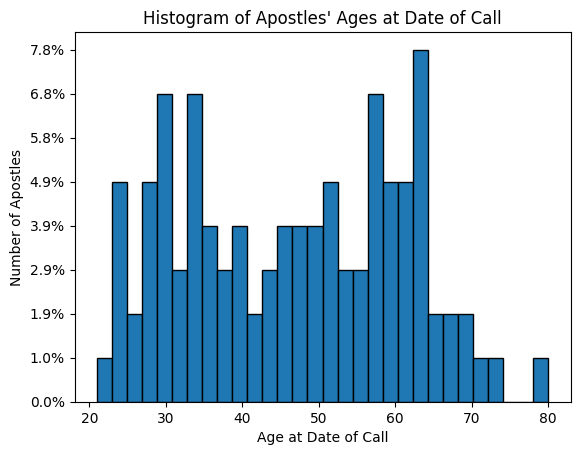

In [17]:
from datetime import datetime

import matplotlib.pyplot as plt

# Calculate ages at date of call
ages_at_call = []
for apostle in apostles:
    birth = datetime.strptime(apostle["birthDate"], "%Y-%m-%d")
    called = datetime.strptime(apostle["dateCalled"], "%Y-%m-%d")
    age = (called - birth).days // 365
    ages_at_call.append(age)

plt.hist(ages_at_call, bins=30, edgecolor='black')
plt.xlabel('Age at Date of Call')
plt.ylabel('Number of Apostles')
plt.title('Histogram of Apostles\' Ages at Date of Call')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y * 100 / len(ages_at_call):.1f}%'))
plt.show()

In [25]:
import numpy as np

def probability_of_age_at_call(age, ages_at_call, bandwidth=2, age_range=(20, 90)):
    """
    Returns a normalized probability (float between 0 and 1) that an apostle was called at the given age.
    Uses kernel density estimation with a Gaussian kernel and ensures probabilities sum to 1 over the age range.
    """
    ages = np.array(ages_at_call)
    all_ages = np.arange(age_range[0], age_range[1] + 1)
    
    # Gaussian kernel smoothing for all ages in the range
    weights = np.exp(-0.5 * ((ages[:, None] - all_ages) / bandwidth) ** 2).sum(axis=0)
    
    # Normalize probabilities
    normalized_weights = weights / weights.sum()
    
    # Return the probability for the specific age
    age_index = age - age_range[0]
    return normalized_weights[age_index]


sum(probability_of_age_at_call(age, ages_at_call) for age in range(20,91))

np.float64(1.0000000000000002)